# Assigning Wildfire Hazard Potential to CDPs using Zonal Statistics


In [6]:
import geopandas as gpd

In [7]:
import rasterio as rio

In [8]:
import rasterstats as rs

In [13]:
from rasterio.plot import show

In [9]:
# read the CDPs shapefile
cdps = gpd.read_file(r"C:\NewMapsPlus\Map698\us-communities-fire\data\cb_2020_us_place_500k.shp")

<AxesSubplot:>

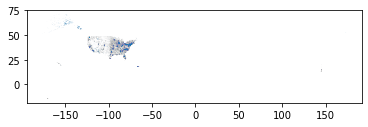

In [10]:
# plot real quick
cdps.plot()

In [14]:
# import the wildfire hzard raster
whp = rio.open(r"C:\NewMapsPlus\Map698\us-communities-fire\data\whp2020_cls_conus.tif")

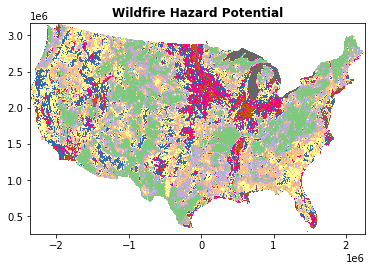

<AxesSubplot:title={'center':'Wildfire Hazard Potential'}>

In [15]:
# plot the raster
show(whp, cmap='Accent', title='Wildfire Hazard Potential')